# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [55]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [24]:
# Memuat dataset hasil clustering
df = pd.read_csv("https://raw.githubusercontent.com/jasmeinalbr/Dicoding-ML-Permula-Submission/main/Dataset_clustering.csv")

df.head()

,Tahun,Upah,Upah Minimum Provinsi,Garis Kemiskinan,Pengeluaran,Label,Jenis,Provinsi,Daerah,Periode
0,2015,1.567050e+06,13639.305166,293697.0,466355.0,Ekonomi Berkembang,Makanan,ACEH,Pedesaan,September
1,2015,1.567050e+06,13639.305166,302128.0,466355.0,Ekonomi Berkembang,Makanan,ACEH,Pedesaan,Maret
2,2015,1.567050e+06,13639.305166,297479.0,395136.0,Ekonomi Berkembang,Makanan,ACEH,Perkotaan,September
3,2015,1.567050e+06,13639.305166,306737.0,395136.0,Ekonomi Berkembang,Makanan,ACEH,Perkotaan,Maret
4,2015,1.567050e+06,13639.305166,296406.0,415354.0,Ekonomi Berkembang,Makanan,ACEH,Pedesaan & Perkotaan,September


In [25]:
# Cek informasi data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tahun                  5040 non-null   int64  
 1   Upah                   5040 non-null   float64
 2   Upah Minimum Provinsi  5040 non-null   float64
 3   Garis Kemiskinan       5040 non-null   float64
 4   Pengeluaran            5040 non-null   float64
 5   Label                  5040 non-null   object 
 6   Jenis                  5040 non-null   object 
 7   Provinsi               5040 non-null   object 
 8   Daerah                 5040 non-null   object 
 9   Periode                5040 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 393.9+ KB
None


In [26]:
# Cek statisik data
df.describe()

,Tahun,Upah,Upah Minimum Provinsi,Garis Kemiskinan,Pengeluaran
count,5040.000000,5.040000e+03,5040.000000,5040.000000,5.040000e+03
mean,2018.500000,2.261665e+06,16408.698288,303161.030754,7.282689e+05
std,2.291515,5.202018e+05,3991.339840,160269.309091,3.053778e+05
min,2015.000000,1.194408e+06,6463.540253,48561.000000,1.760280e+05
25%,2016.750000,1.876469e+06,13474.407538,139363.500000,5.019262e+05
50%,2018.500000,2.204031e+06,16308.189585,314506.000000,6.595245e+05
75%,2020.250000,2.539250e+06,19249.405155,412366.250000,8.965478e+05
max,2022.000000,3.632653e+06,26309.502536,820543.000000,1.596694e+06


In [27]:
# Cek missing values
print("Missing Values:\n", df.isnull().sum())

# Cek duplikat data
print("\nJumlah duplikat data:", df.duplicated().sum())

Missing Values:
 Tahun                    0
Upah                     0
Upah Minimum Provinsi    0
Garis Kemiskinan         0
Pengeluaran              0
Label                    0
Jenis                    0
Provinsi                 0
Daerah                   0
Periode                  0
dtype: int64

Jumlah duplikat data: 0


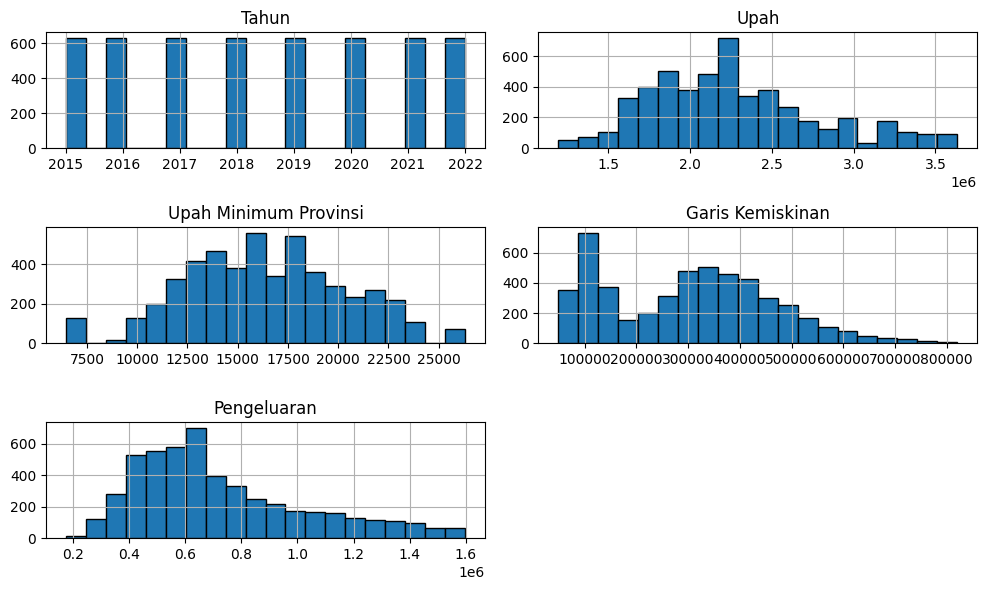

In [28]:
# Histograms untuk fitur numerik
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

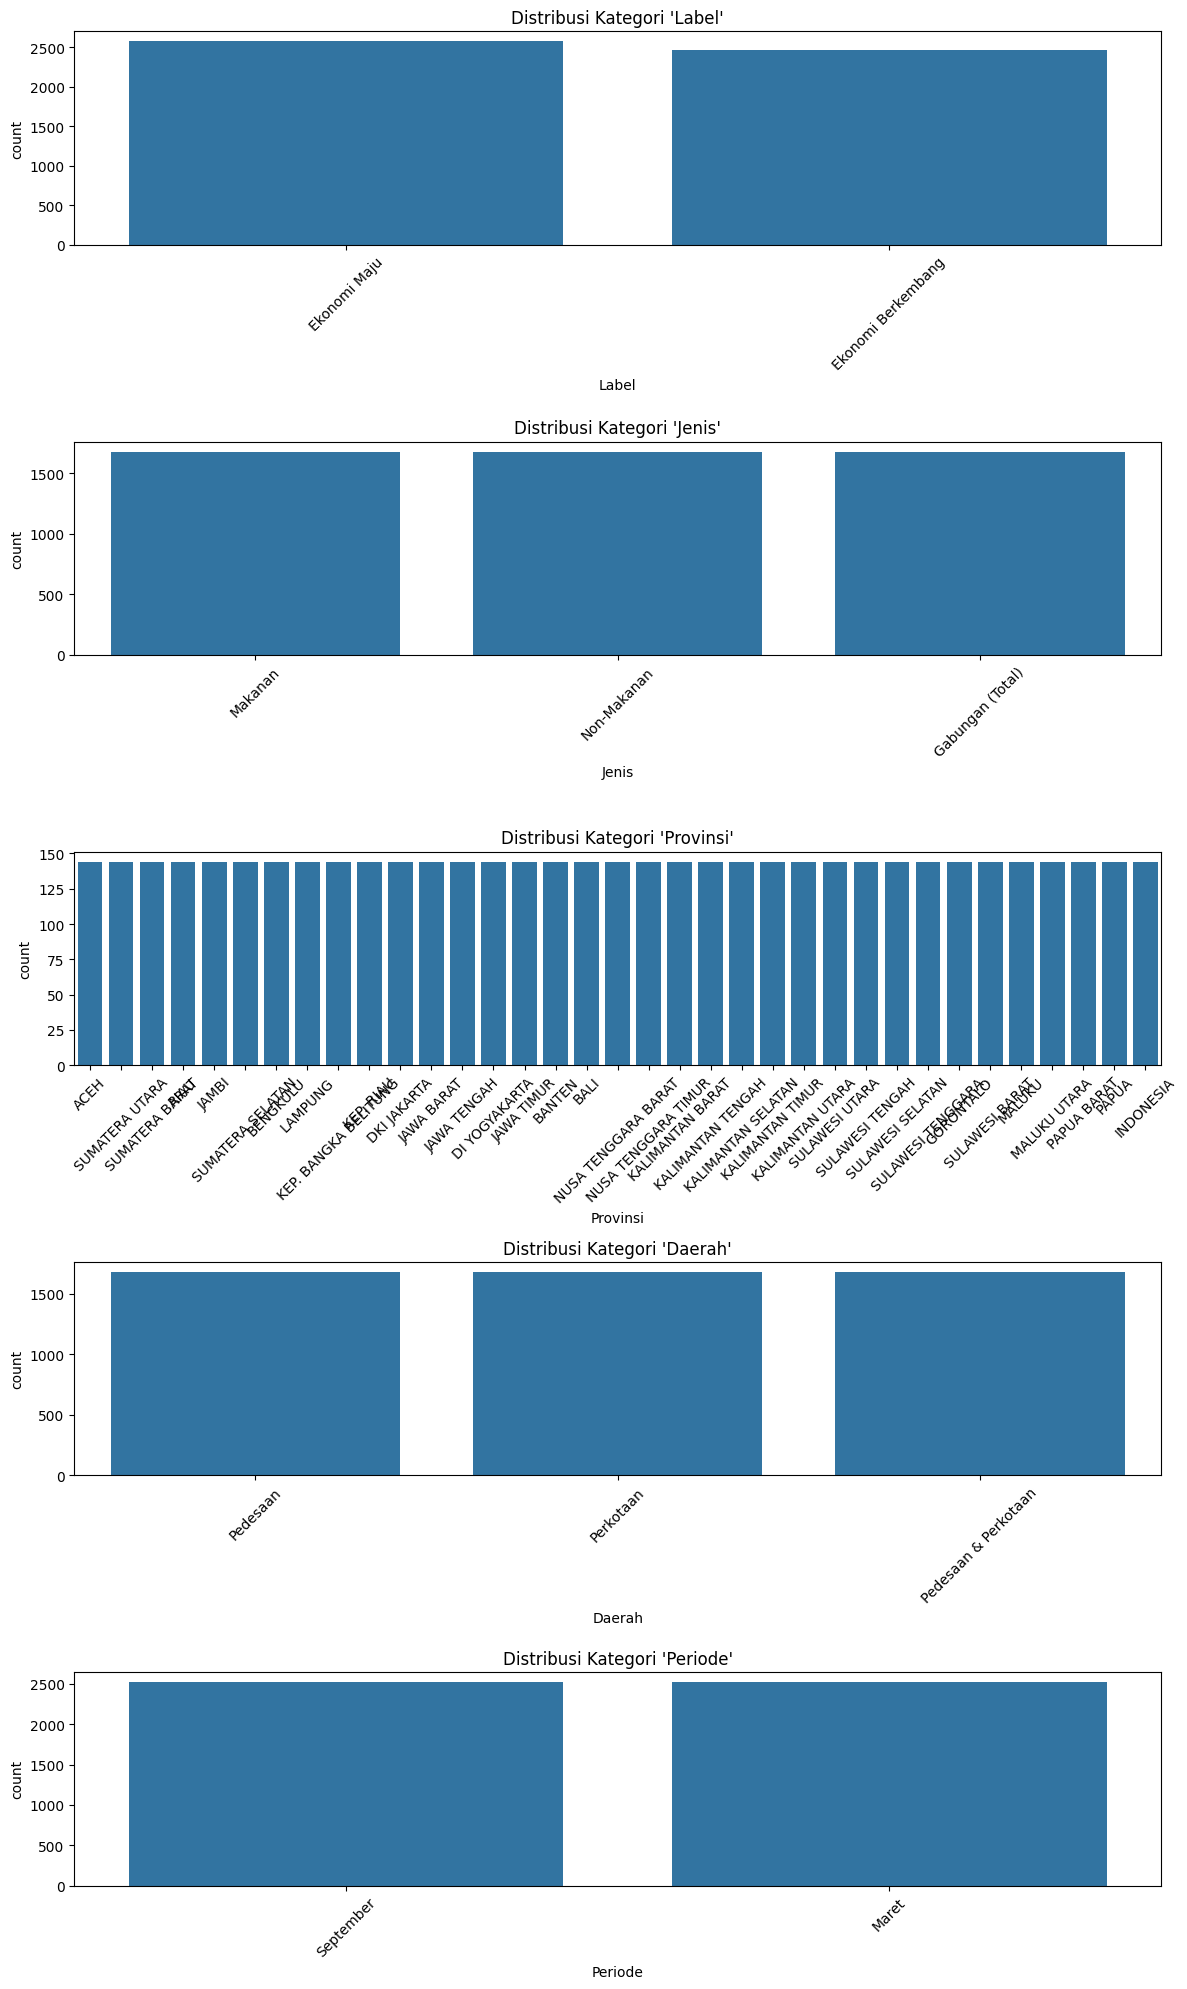

In [29]:
# Pilih semua kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Buat plot untuk setiap kolom kategorikal
plt.figure(figsize=(12, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribusi Kategori '{col}'")
    plt.xticks(rotation=45)  # Memutar label jika panjang
plt.tight_layout()
plt.show()

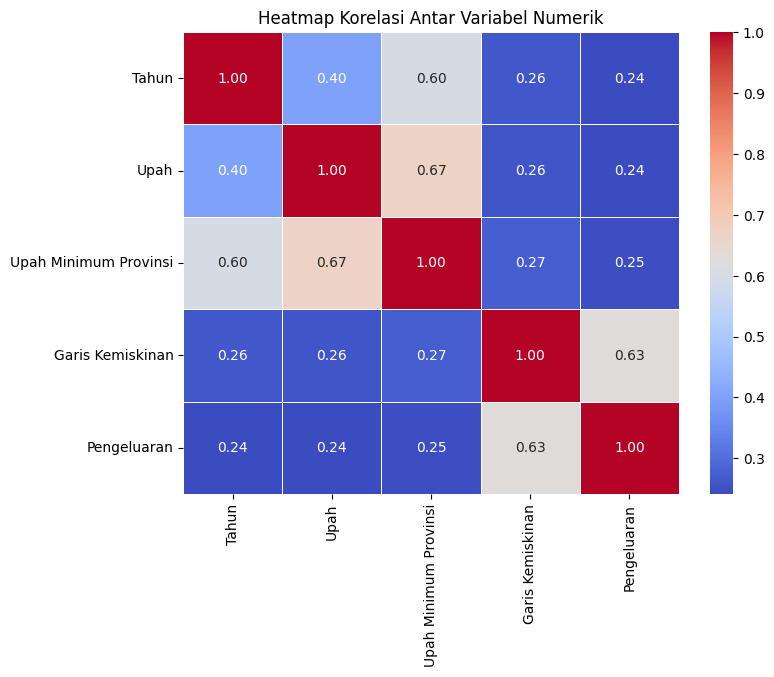

In [30]:
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['number'])

# Buat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

# **4. Membangun Model Klasifikasi**


In [39]:
# Pilih fitur dan target
X = df.drop(columns=['Label'])  # Fitur
y = df['Label']  # Target

# Encoding kolom kategorikal menggunakan LabelEncoder
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['number']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Cek hasil
X.head()

,Tahun,Upah,Upah Minimum Provinsi,Garis Kemiskinan,Pengeluaran,Jenis,Provinsi,Daerah,Periode
0,-1.527525,-1.335412,-0.693919,-0.059057,-0.857757,0.0,-1.683251,-1.224745,1.0
1,-1.527525,-1.335412,-0.693919,-0.006446,-0.857757,0.0,-1.683251,-1.224745,-1.0
2,-1.527525,-1.335412,-0.693919,-0.035457,-1.090996,0.0,-1.683251,1.224745,1.0
3,-1.527525,-1.335412,-0.693919,0.022314,-1.090996,0.0,-1.683251,1.224745,-1.0
4,-1.527525,-1.335412,-0.693919,-0.042152,-1.024783,0.0,-1.683251,0.000000,1.0


In [60]:
# Split dataset menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(4032, 9), y_train=(4032,)
Test set shape: X_test=(1008, 9), y_test=(1008,)


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [61]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Latih Random Forest
rf_model.fit(X_train, y_train)
print("Model training - Random Forest - selesai")

# Latih SVM
svm_model.fit(X_train, y_train)
print("Model training - SVM - selesai")

Model training - Random Forest - selesai
Model training - SVM - selesai


Random Forest (RF) adalah algoritma berbasis pohon keputusan yang bekerja dengan menggabungkan banyak pohon. RF biasanya cocok untuk dataset dengan banyak fitur karena dapat menangani data numerik maupun kategorikal dengan baik, serta memberikan hasil yang stabil meskipun terdapat variasi dalam data.

Support Vector Machine (SVM) adalah algoritma yang mencari garis pemisah terbaik antara kelas-kelas dalam data. SVM biasanya untuk data dengan dimensi tinggi dan dapat digunakan pada dataset yang tidak terdistribusi secara linear dengan bantuan kernel trick. Mampu menangani klasifikasi kompleks dengan performa yang baik, terutama saat data memiliki pola yang tidak jelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [62]:
# 1. Prediksi menggunakan data uji
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# 2. Hitung metrik evaluasi
print("\nEvaluasi Model Klasifikasi")

# Accuracy tidak memerlukan parameter 'average'
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy - Random Forest: {accuracy_rf:.4f} | SVM: {accuracy_svm:.4f}")

# Metrik lain membutuhkan 'average'
for metric_name, metric_func in [("F1 Score", f1_score),
                                 ("Precision", precision_score),
                                 ("Recall", recall_score)]:
    rf_score = metric_func(y_test, y_pred_rf, average='weighted')
    svm_score = metric_func(y_test, y_pred_svm, average='weighted')
    print(f"{metric_name} - Random Forest: {rf_score:.4f} | SVM: {svm_score:.4f}")


Evaluasi Model Klasifikasi

Accuracy - Random Forest: 1.0000 | SVM: 0.9980
F1 Score - Random Forest: 1.0000 | SVM: 0.9980
Precision - Random Forest: 1.0000 | SVM: 0.9980
Recall - Random Forest: 1.0000 | SVM: 0.9980


In [63]:
# 3. Buat Confusion Matrix
print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\nConfusion Matrix - SVM")
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix - Random Forest
[[493   0]
 [  0 515]]

Confusion Matrix - SVM
[[492   1]
 [  1 514]]


In [64]:
# Evaluasi pada training set
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_svm = svm_model.predict(X_train)

metrics = {
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}

# Buat dictionary untuk menyimpan hasil evaluasi
evaluation_results = {"Model": [], "Dataset": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

# Fungsi untuk menambahkan hasil ke dictionary
def add_results(model_name, dataset, y_true, y_pred):
    evaluation_results["Model"].append(model_name)
    evaluation_results["Dataset"].append(dataset)
    evaluation_results["Accuracy"].append(accuracy_score(y_true, y_pred))  # Accuracy tidak butuh 'average'

    # Hitung Precision, Recall, F1-Score dengan 'weighted'
    for metric_name, metric_func in metrics.items():
        evaluation_results[metric_name].append(metric_func(y_true, y_pred, average='weighted'))

# Evaluasi Random Forest
add_results("Random Forest", "Train", y_train, y_train_pred_rf)
add_results("Random Forest", "Test", y_test, y_pred_rf)

# Evaluasi SVM
add_results("SVM", "Train", y_train, y_train_pred_svm)
add_results("SVM", "Test", y_test, y_pred_svm)

# Konversi hasil evaluasi ke DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Tampilkan hasil evaluasi
print(evaluation_df)

           Model Dataset  Accuracy  Precision    Recall  F1 Score
0  Random Forest   Train  1.000000   1.000000  1.000000  1.000000
1  Random Forest    Test  1.000000   1.000000  1.000000  1.000000
2            SVM   Train  0.996032   0.996034  0.996032  0.996032
3            SVM    Test  0.998016   0.998016  0.998016  0.998016


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### Evaluasi Model Klasifikasi

Hasil evaluasi menunjukkan bahwa Random Forest (RF) memiliki akurasi sempurna (100%) baik pada data pelatihan maupun pengujian. Hal ini menunjukkan bahwa model RF mampu mengklasifikasikan data dengan sangat baik, tetapi juga dapat mengindikasikan overfitting, karena tidak ada kesalahan prediksi sama sekali. Confusion Matrix RF menunjukkan tidak adanya False Positive maupun False Negative, yang berarti semua sampel diklasifikasikan dengan benar.

Di sisi lain, Support Vector Machine (SVM) memiliki sedikit lebih rendah performanya dibanding RF, dengan akurasi 99.72% pada data pelatihan dan 99.47% pada data pengujian. Perbedaannya kecil, tetapi lebih realistis dibandingkan RF karena masih ada beberapa kesalahan prediksi (2 False Positive dan 2 False Negative dalam confusion matrix). Ini menunjukkan bahwa SVM lebih generalisasi terhadap data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [65]:
# Hyperparameter Tuning model Random Forest menggunakan Bayesian Optimization
rf = RandomForestClassifier(random_state=42)

# Tentukan ruang pencarian hyperparameter
param_rf = {
    'n_estimators': (50, 300),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5)
}

# Lakukan Bayesian Optimization
bayes_rf = BayesSearchCV(rf, param_rf, n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
bayes_rf.fit(X_train, y_train)

# Hasil hyperparameter terbaik
print("Best Parameters (RF):", bayes_rf.best_params_)

Best Parameters (RF): OrderedDict([('max_depth', 42), ('min_samples_leaf', 2), ('min_samples_split', 7), ('n_estimators', 251)])


In [66]:
# Hyperparameter Tuning model SVM menggunakan Bayesian Optimization
svm = SVC()

# Tentukan ruang pencarian hyperparameter
param_svm = {
    'C': (0.1, 100, 'log-uniform'),
    'gamma': (0.001, 1, 'log-uniform'),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Lakukan Bayesian Optimization
bayes_svm = BayesSearchCV(svm, param_svm, n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
bayes_svm.fit(X_train, y_train)

# Hasil hyperparameter terbaik
print("Best Parameters (SVM):", bayes_svm.best_params_)

Best Parameters (SVM): OrderedDict([('C', 100.0), ('gamma', 0.02849158201110518), ('kernel', 'rbf')])


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [71]:
# 1. Gunakan model dengan hyperparameter terbaik
rf_tuned = RandomForestClassifier(n_estimators=69, max_depth=35, min_samples_split=5, min_samples_leaf=1, random_state=42)
svm_tuned = SVC(C=100.0, gamma=0.08023427398335782, kernel='rbf', random_state=42)

# Train ulang model
rf_tuned.fit(X_train, y_train)
svm_tuned.fit(X_train, y_train)

# Prediksi ulang
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_svm_tuned = svm_tuned.predict(X_test)

# 2. Hitung ulang metrik evaluasi
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred) * 100,
        'Precision': precision_score(y_true, y_pred, average='weighted') * 100,
        'Recall': recall_score(y_true, y_pred, average='weighted') * 100,
        'F1-Score': f1_score(y_true, y_pred, average='weighted') * 100,
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

# Evaluasi model setelah tuning
rf_results_tuned = evaluate_model(y_test, y_pred_rf_tuned)
svm_results_tuned = evaluate_model(y_test, y_pred_svm_tuned)

# 3. Tampilkan hasil dalam DataFrame
summary_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'SVM (Tuned)'],
    'Accuracy (%)': [rf_results_tuned['Accuracy'], svm_results_tuned['Accuracy']],
    'Precision (%)': [rf_results_tuned['Precision'], svm_results_tuned['Precision']],
    'Recall (%)': [rf_results_tuned['Recall'], svm_results_tuned['Recall']],
    'F1-Score (%)': [rf_results_tuned['F1-Score'], svm_results_tuned['F1-Score']]
})

# Print hasil evaluasi
print(summary_tuned)

# Print Confusion Matrix
print("\nConfusion Matrix - Random Forest (Tuned):\n", rf_results_tuned['Confusion Matrix'])
print("\nConfusion Matrix - SVM (Tuned):\n", svm_results_tuned['Confusion Matrix'])

                   Model  Accuracy (%)  Precision (%)  Recall (%)  \
0  Random Forest (Tuned)         100.0          100.0       100.0   
1            SVM (Tuned)         100.0          100.0       100.0   

   F1-Score (%)  
0         100.0  
1         100.0  

Confusion Matrix - Random Forest (Tuned):
 [[493   0]
 [  0 515]]

Confusion Matrix - SVM (Tuned):
 [[493   0]
 [  0 515]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Perbandingan Sebelum dan Setelah Tuning
##### Sebelum tuning:
- Random Forest sudah menunjukkan performa sempurna dengan akurasi dan F1-score 100%.
- SVM memiliki sedikit kesalahan prediksi, yang terlihat dari akurasi dan F1-score yang tidak mencapai 100%.

##### Setelah tuning:
- Kedua model mencapai 100% di semua metrik evaluasi, termasuk akurasi, precision, recall, dan F1-score.
- Ini menunjukkan bahwa tuning hyperparameter berhasil meningkatkan performa SVM hingga setara dengan Random Forest.

### Identifikasi Kelemahan Model
##### Potensi Overfitting:
- Semua metrik bernilai 100%, yang biasanya jarang terjadi pada data nyata.
- Confusion matrix menunjukkan tidak ada kesalahan prediksi sama sekali, yang bisa menjadi tanda bahwa model terlalu ingat pola data latih dan mungkin tidak bekerja baik pada data baru.

##### Kemungkinan Data Kurang Variatif:
- Jika model terlalu mudah mendapatkan akurasi sempurna, mungkin dataset kurang kompleks atau tidak cukup mencerminkan situasi di dunia nyata.
- Perlu diperiksa apakah dataset mencakup berbagai kemungkinan skenario yang bisa terjadi dalam kasus nyata.

### Rekomendasi Tindakan Lanjutan
- Periksa Kualitas dan Variasi Data
- Pastikan dataset memiliki beragam skenario dan kasus sulit agar model tidak hanya belajar dari pola yang mudah.
- Tambahkan data baru yang lebih bervariasi untuk menguji apakah model tetap bisa bekerja dengan baik.
- Uji Model Lain untuk Perbandingan. Jika model lain tidak mendapatkan 100%, ini bisa jadi tanda bahwa Random Forest dan SVM memang mengalami overfitting.